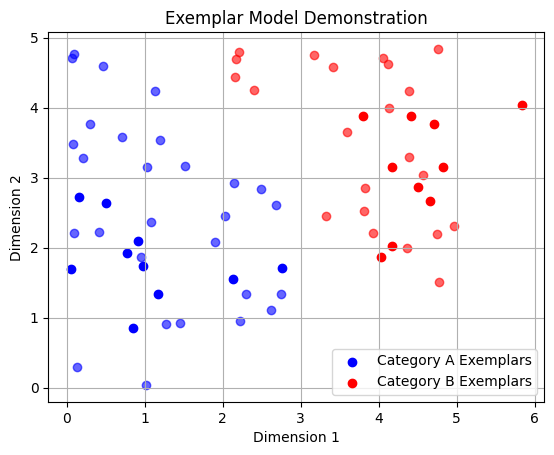

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate exemplars for two categories
def generate_exemplars(num_exemplars_per_category=10):
    category_a = np.random.multivariate_normal([1.0, 2.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    category_b = np.random.multivariate_normal([4.0, 3.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    return category_a, category_b

# Generate random stimuli
def generate_stimuli(num_stimuli, dimensions, bounds=(0, 5)):
    return np.random.uniform(bounds[0], bounds[1], (num_stimuli, dimensions))

# Compute similarity (e.g., negative Euclidean distance)
def calculate_similarity(stimulus, exemplar):
    return -np.linalg.norm(stimulus - exemplar)

# Categorize stimuli based on exemplar similarities
def categorize_stimuli_with_exemplars(stimuli, category_a, category_b):
    categories = []
    for stimulus in stimuli:
        similarity_a = sum(calculate_similarity(stimulus, exemplar) for exemplar in category_a)
        similarity_b = sum(calculate_similarity(stimulus, exemplar) for exemplar in category_b)
        
        best_category = "Category A" if similarity_a > similarity_b else "Category B"
        categories.append((stimulus, best_category))
    return categories

# Visualize exemplars, stimuli, and categories
def visualize_results_with_exemplars(category_a, category_b, categorized_stimuli):
    colors = {"Category A": "blue", "Category B": "red"}
    
    # Plot exemplars
    plt.scatter(category_a[:, 0], category_a[:, 1], color="blue", marker='o', label="Category A Exemplars")
    plt.scatter(category_b[:, 0], category_b[:, 1], color="red", marker='o', label="Category B Exemplars")
    
    # Plot stimuli
    for stimulus, category in categorized_stimuli:
        plt.scatter(*stimulus, color=colors[category], alpha=0.6)
    
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Exemplar Model Demonstration")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    num_exemplars_per_category = 10
    num_stimuli = 50
    dimensions = 2
    
    # Generate exemplars and stimuli
    category_a, category_b = generate_exemplars(num_exemplars_per_category)
    stimuli = generate_stimuli(num_stimuli, dimensions)
    
    # Categorize stimuli
    categorized_stimuli = categorize_stimuli_with_exemplars(stimuli, category_a, category_b)
    
    # Visualize results
    visualize_results_with_exemplars(category_a, category_b, categorized_stimuli)


Epoch [100/500], Loss: 0.0006
Epoch [200/500], Loss: 0.0003
Epoch [300/500], Loss: 0.0002
Epoch [400/500], Loss: 0.0002
Epoch [500/500], Loss: 0.0001


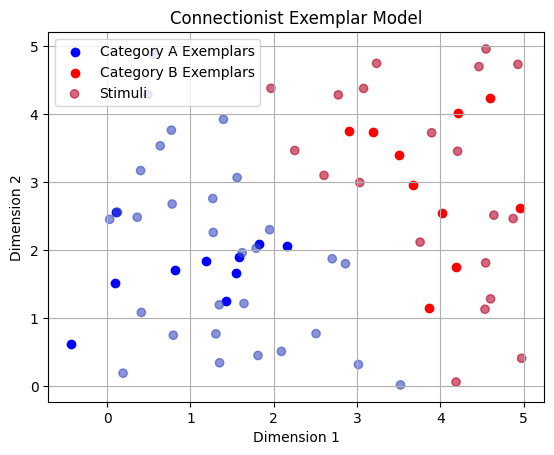

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate exemplars for two categories
def generate_exemplars(num_exemplars_per_category=10):
    category_a = np.random.multivariate_normal([1.0, 2.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    category_b = np.random.multivariate_normal([4.0, 3.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    return category_a, category_b

# Define the connectionist Exemplar model
class ExemplarNN(nn.Module):
    def __init__(self, exemplars, num_categories):
        super(ExemplarNN, self).__init__()
        self.exemplars = nn.Parameter(torch.FloatTensor(exemplars), requires_grad=False)  # Store exemplars
        self.fc = nn.Linear(exemplars.shape[0], num_categories)  # Map number of exemplars to categories
    
    def forward(self, x):
        # Compute similarity to each exemplar (negative squared Euclidean distance)
        similarities = -torch.cdist(x, self.exemplars) ** 2
        return self.fc(similarities)

# Training function
def train_model(model, data, labels, epochs=500, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=lr)
    
    for epoch in range(epochs):
        inputs = torch.FloatTensor(data)
        targets = torch.LongTensor(labels)
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Main execution
if __name__ == "__main__":
    num_exemplars_per_category = 10
    num_stimuli = 50
    dimensions = 2
    num_categories = 2
    
    # Generate exemplars and stimuli
    category_a, category_b = generate_exemplars(num_exemplars_per_category)
    exemplars = np.vstack((category_a, category_b))
    labels = [0] * num_exemplars_per_category + [1] * num_exemplars_per_category
    
    stimuli = np.random.uniform(0, 5, (num_stimuli, dimensions))
    
    # Model initialization
    model = ExemplarNN(exemplars, num_categories)
    
    # Train model
    train_model(model, exemplars, labels)
    
    # Test model
    with torch.no_grad():
        predictions = model(torch.FloatTensor(stimuli)).argmax(dim=1).numpy()
    
    # Visualization
    plt.scatter(category_a[:, 0], category_a[:, 1], color="blue", label="Category A Exemplars")
    plt.scatter(category_b[:, 0], category_b[:, 1], color="red", label="Category B Exemplars")
    plt.scatter(stimuli[:, 0], stimuli[:, 1], c=predictions, cmap="coolwarm", alpha=0.6, label="Stimuli")
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Connectionist Exemplar Model")
    plt.grid(True)
    plt.show()


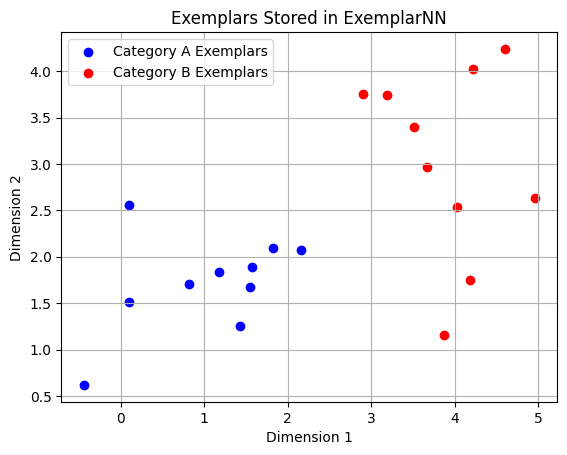

In [3]:
# Visualize stored exemplars
stored_exemplars = model.exemplars.detach().numpy()
category_a_exemplars = stored_exemplars[:num_exemplars_per_category]
category_b_exemplars = stored_exemplars[num_exemplars_per_category:]

plt.scatter(category_a_exemplars[:, 0], category_a_exemplars[:, 1], color="blue", label="Category A Exemplars")
plt.scatter(category_b_exemplars[:, 0], category_b_exemplars[:, 1], color="red", label="Category B Exemplars")
plt.title("Exemplars Stored in ExemplarNN")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

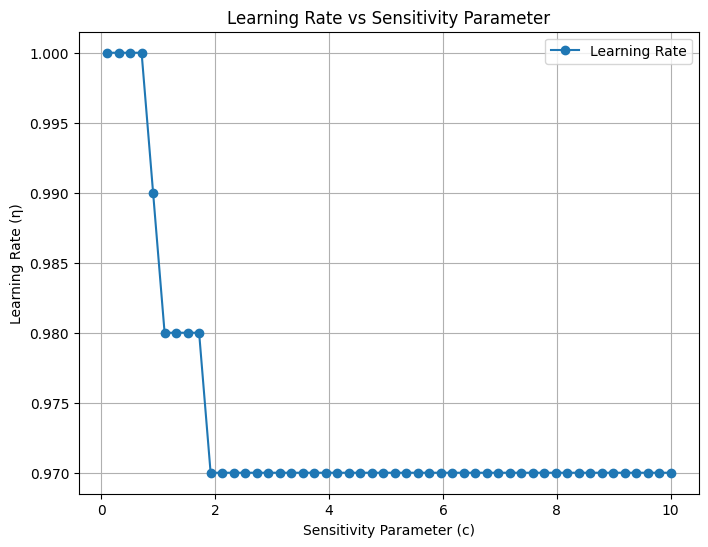

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate exemplars for two categories
def generate_exemplars(num_exemplars_per_category=10):
    category_a = np.random.multivariate_normal([1.0, 2.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    category_b = np.random.multivariate_normal([4.0, 3.0], [[0.5, 0], [0, 0.5]], num_exemplars_per_category)
    return category_a, category_b

# Compute similarity with sensitivity parameter c
def compute_similarity(stimulus, exemplar, sensitivity):
    distance = np.linalg.norm(stimulus - exemplar)
    return np.exp(-sensitivity * distance ** 2)

# Categorize stimuli with sensitivity
def categorize_with_sensitivity(stimuli, category_a, category_b, sensitivity):
    categories = []
    for stimulus in stimuli:
        similarity_a = sum(compute_similarity(stimulus, exemplar, sensitivity) for exemplar in category_a)
        similarity_b = sum(compute_similarity(stimulus, exemplar, sensitivity) for exemplar in category_b)
        categories.append("Category A" if similarity_a > similarity_b else "Category B")
    return categories

# Simulate learning rate vs sensitivity
def simulate_learning_rate(category_a, category_b, num_stimuli, sensitivities):
    # Generate stimuli with ground truth labels
    stimuli = np.random.uniform(0, 5, (num_stimuli, 2))
    true_labels = [
        "Category A" if np.linalg.norm(stimulus - category_a.mean(axis=0)) <
        np.linalg.norm(stimulus - category_b.mean(axis=0)) else "Category B"
        for stimulus in stimuli
    ]
    
    learning_rates = []
    for sensitivity in sensitivities:
        predicted_labels = categorize_with_sensitivity(stimuli, category_a, category_b, sensitivity)
        correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
        learning_rate = correct / num_stimuli
        learning_rates.append(learning_rate)
    
    return sensitivities, learning_rates

# Plot learning rate vs sensitivity
def plot_learning_rate(sensitivities, learning_rates):
    plt.figure(figsize=(8, 6))
    plt.plot(sensitivities, learning_rates, marker="o", label="Learning Rate")
    plt.xlabel("Sensitivity Parameter (c)")
    plt.ylabel("Learning Rate (η)")
    plt.title("Learning Rate vs Sensitivity Parameter")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_exemplars_per_category = 10
    num_stimuli = 100
    sensitivities = np.linspace(0.1, 10.0, 50)
    
    # Generate exemplars
    category_a, category_b = generate_exemplars(num_exemplars_per_category)
    
    # Simulate learning rates
    sensitivities, learning_rates = simulate_learning_rate(category_a, category_b, num_stimuli, sensitivities)
    
    # Plot results
    plot_learning_rate(sensitivities, learning_rates)
